# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward **non-technical** executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a **state of your choice**.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

Q1 : Does participation rate has any correlation with average English, average Math or average total?

*All libraries used should be added here*

In [169]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
import math as math

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 & 2018 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

In [170]:
# Upload of sat_2018.csv to pandas dataframe called sat_18
sat_18 = pd.read_csv('../data/sat_2018.csv')

# Upload of act_2018_updated.csv to pandas dataframe called act_18
act_18 = pd.read_csv('../data/act_2018_updated.csv')

# Upload of sat_2017.csv to pandas dataframe called sat_17
sat_17 = pd.read_csv('../data/sat_2017.csv')

# Upload of act_2017.csv to pandas dataframe called act_17
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [171]:
sat_17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [172]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [173]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:


-  SAT 17 dataset has a count of 51 and ACT 17 dataset has a count of 52 
-  ACT 17 dataset as addtional state as 'National', so needs to be removed  

In [174]:
sat_17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [175]:
act_17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 4a. Does the data look complete? 

Answer: Data looks complete as there are no null values in neither of the datasets.

In [176]:
sat_17.isnull().sum() # counting for any null values

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [177]:
act_17.isnull().sum() # counting for any null values

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**
Answer: 

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Observations:
1 - National average of SAT in the sat 17 dataset is 1126 while national average  at the source is the 1060
2 - Upon comparing sat_17 dataframe with the source 2017 SAT table, there was one data error in average math score for Marylnd state.
3 - there was one data capture error for Science score for Maryland state found in act_17 dataframe once compare with source ACT table for 2017.
4 - Within 2017 ACT dataframe the composite score for Wyoming state was non number (20.2x) data


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [179]:
#Function to remove 'x' character in one of the cells under Composite 
# columm and converting every cell to float
def to_float(x):
    return float(str(x).strip('x'))


In [180]:
# cleaning cell with 'Composite' colum
act_17['Composite'] = act_17['Composite'].apply(to_float)

In [181]:
act_17.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [182]:
# manually fixed Science average score for Science test of ACT in 2017  
act_17.loc[21,'Science'] = 23.2
act_17.loc[21,'Science'] 

23.2

In [185]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


#### 5. What are your data types? 
Display the data types of each feature. 

In [186]:
#code
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [187]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Both 'Participation' in both sat_17 and act_17 as well as and 'Composite' column in act_17 should be numerical, but are of 'object' type. Which means that not all the cells under these columns have float or int value as expected.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [189]:
# Funtion to convert string with % sign to float type 
def percent_to_float(x):
    return float(str(x).replace('%',''))

In [190]:
# 
sat_17['Participation'] = sat_17['Participation'].apply(percent_to_float) 



In [191]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [192]:
# Parti column now has float64 as data type
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [193]:
# convert Participation column to float by using my own percent_to_float function
act_17['Participation'] = act_17['Participation'].apply(percent_to_float)


In [194]:
act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [195]:
# Participation is now a float64 type column
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [196]:
#Code: participation_rate is now a float64 type column
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [197]:
# rename columns in sat_17
sat_17.rename(columns={'State' : 'state', 'Participation' : 'sat17_participation', \
'Evidence-Based Reading and Writing' : 'sat17_erw', 'Math' :'sat17_math',\
       'Total' : 'sat17_total'},inplace = True)


In [198]:
# rename columns in act_17
act_17.rename(columns={'State' : 'state', 'Participation' : 'act17_participation', \
'English' : 'act17_english', 'Math' :'act17_math', 'Reading' :'act17_reading', 'Science' :'act17_science' ,\
       'Composite' : 'act17_composite'},inplace = True)





In [199]:
sat_17.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   sat17_participation  51 non-null     float64
 2   sat17_erw            51 non-null     int64  
 3   sat17_math           51 non-null     int64  
 4   sat17_total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [200]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                52 non-null     object 
 1   act17_participation  52 non-null     float64
 2   act17_english        52 non-null     float64
 3   act17_math           52 non-null     float64
 4   act17_reading        52 non-null     float64
 5   act17_science        52 non-null     float64
 6   act17_composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|sat_17|Name of the state with SAT score| 
|sat17_participation|float|sat_17|Overall SAT participation rate for the state|
|sat17_erw|int|sat_17|Average score for evidence based English - reading and writing in SAT for the state |
|sat17_math|int|sat_17|Average score for math in SAT for the state|
|sat17_total|int|sat_17|Average total SAT score for the state|
|state|object|act_17|Name of the state with ACT scores|
|act17_participation|float|act_17|Overall ACT participation rate for the state|
|act17_english|float|act_17|Average score for English in ACT for the state|
|act17_math|float|act_17|Average score for Math in ACT for the state|
|act17_reading|float|act_17|Average score for Reading in ACT for the state|
|act17_science|float|act_17|Average score for Science in ACT for the state|
|act17_composite|float|act_17|Average Composite score in ACT for the state|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [201]:
act_17.loc[0]

state                  National
act17_participation          60
act17_english              20.3
act17_math                 20.7
act17_reading              21.4
act17_science                21
act17_composite              21
Name: 0, dtype: object

In [202]:
#code Dropped row with index 0 which contained addtional state 'National'.

act_17.drop(act_17.index[0],axis=0,inplace=True)

In [203]:
act_17.count()

state                  51
act17_participation    51
act17_english          51
act17_math             51
act17_reading          51
act17_science          51
act17_composite        51
dtype: int64

In [204]:
sat_17.count()

state                  51
sat17_participation    51
sat17_erw              51
sat17_math             51
sat17_total            51
dtype: int64

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [205]:
# Using inner join to merge sat_17 & act_17 dataframes on 'state' column as key
sat_act_17 = pd.merge(sat_17, act_17, on='state', how = 'inner')

In [206]:
sat_act_17.head()

,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [207]:
# exporting the combibed sat_act_17 dataframe to 'combined_2017.csv' file in '../data' folder.
sat_act_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [208]:
# upload 2018 SAT and ACT data into sat_18 and act_18 dataframes.
sat_18 = pd.read_csv('../data/sat_2018.csv')
act_18 = pd.read_csv('../data/act_2018_updated.csv')

In [209]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [210]:
# covert participation columns to float by stripping % sign/
sat_18['Participation'] = sat_18['Participation'].apply(percent_to_float) 

In [211]:
# rename columns in sat_18 to more readable and distinguished names
sat_18.rename(columns={'State' : 'state', 'Participation' : 'sat18_participation', \
'Evidence-Based Reading and Writing' : 'sat18_erw', 'Math' :'sat18_math',\
       'Total' : 'sat18_total'},inplace = True)

In [212]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   sat18_participation  51 non-null     float64
 2   sat18_erw            51 non-null     int64  
 3   sat18_math           51 non-null     int64  
 4   sat18_total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [213]:
# convert 'Participation of Students Tested' column to float by using my own percent_to_float function
act_18['Percentage of Students Tested'] = act_18['Percentage of Students Tested'].apply(percent_to_float)



In [214]:
# rename columns in act_18 to more readable and distinguished names
act_18.rename(columns={'State' : 'state', 'Percentage of Students Tested' : 'act18_participation', \
'Average English Score' : 'act18_english', 'Average Math Score' :'act18_math', 'Average Reading Score' :'act18_reading', 'Average Science Score' :'act18_science' ,\
       'Average Composite Score' : 'act18_composite'},inplace = True)

In [215]:
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   act18_participation  51 non-null     float64
 2   act18_composite      51 non-null     float64
 3   act18_english        51 non-null     float64
 4   act18_math           51 non-null     float64
 5   act18_reading        51 non-null     float64
 6   act18_science        51 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [216]:
sat_act_18 = pd.merge(sat_18,act_18, on='state', how='inner')

In [217]:
sat_act_final = pd.merge(sat_act_17,sat_act_18, on='state', how='inner')

In [46]:
sat_act_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                51 non-null     object 
 1   sat17_participation  51 non-null     float64
 2   sat17_erw            51 non-null     int64  
 3   sat17_math           51 non-null     int64  
 4   sat17_total          51 non-null     int64  
 5   act17_participation  51 non-null     float64
 6   act17_english        51 non-null     float64
 7   act17_math           51 non-null     float64
 8   act17_reading        51 non-null     float64
 9   act17_science        51 non-null     float64
 10  act17_composite      51 non-null     float64
 11  sat18_participation  51 non-null     float64
 12  sat18_erw            51 non-null     int64  
 13  sat18_math           51 non-null     int64  
 14  sat18_total          51 non-null     int64  
 15  act18_participation  51 non-null     float

In [218]:
sat_act_final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [219]:
# Tranpose the describe() data of final dataframe and stored in final_desc 
final_desc =  sat_act_final.describe().T

In [220]:
final_desc

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,547.627451,84.909119,52.0,522.00,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [52]:
# Function to calculate standard deviation for a pd Series. 
def std_calc(sseries):
    smean = sseries.mean()
    n = len(sseries)
    variance = 0.0
    sstd = 0.0
    for value in sseries.index:
        variance = variance + (sseries[value] - smean) ** 2
    sstd = float(math.sqrt(variance / n))
    return sstd

In [53]:
std = std_calc(sat_act_final['sat17_total'])

In [54]:
print (std)

91.58351056778743


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [221]:
#Create a dictionary with standard deviation for each columns in sat_act_final by use my own std_calc function.
std_dict = {col : std_calc(sat_act_final[col]) for col in sat_act_final if sat_act_final[col].dtypes != 'object'}

In [222]:
std_dict

{'sat17_participation': 34.92907076664508,
 'sat17_erw': 45.21697020437866,
 'sat17_math': 84.07255521608297,
 'sat17_total': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat18_participation': 36.946619223539415,
 'sat18_erw': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433,
 'act18_participation': 33.745194881997506,
 'act18_composite': 2.0855261815801147,
 'act18_english': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_science': 1.8516885484833543}

In [223]:
# STD canculated by pandas 
sat_act_final.std()

sat17_participation    35.276632
sat17_erw              45.666901
sat17_math             84.909119
sat17_total            92.494812
act17_participation    32.140842
act17_english           2.353677
act17_math              1.981989
act17_reading           2.067271
act17_science           1.739353
act17_composite         2.020695
sat18_participation    37.314256
sat18_erw              47.502627
sat18_math             47.772623
sat18_total            94.155083
act18_participation    34.080976
act18_composite         2.106278
act18_english           2.446356
act18_math              2.035765
act18_reading           2.167245
act18_science           1.870114
dtype: float64

In [224]:
# std calculated by numpy
np.std(sat_act_final,ddof=1)

sat17_participation    35.276632
sat17_erw              45.666901
sat17_math             84.909119
sat17_total            92.494812
act17_participation    32.140842
act17_english           2.353677
act17_math              1.981989
act17_reading           2.067271
act17_science           1.739353
act17_composite         2.020695
sat18_participation    37.314256
sat18_erw              47.502627
sat18_math             47.772623
sat18_total            94.155083
act18_participation    34.080976
act18_composite         2.106278
act18_english           2.446356
act18_math              2.035765
act18_reading           2.167245
act18_science           1.870114
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer : STD values calculated by my std_calc function and numpy's std() functions match, however std values calculted by pandas are marginally different. This is becuase Pandas uses the unbiased estimator ( N-1 in the denominator), whereas Numpy by default does not. To make them behave the same, we could pass parameter ddof=1 to np.std() function or if I use n-1 as denominator for calculating variance in my std_calc function.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

Which states have the highest and lowest participation rates for the:
2017 SAT = highest:District of Columbia, Michigan, Conneticut and Delaware lowest : Iowa

2018 SAT = highest: Colorado, Connecticut, Delaware, Michigan, idaho lowest: North Dakota

2017 ACT = highest:Alabama', 'Kentucky', 'Wisconsin', 'Utah', 'Tennessee',
       'South Carolina', 'Oklahoma', 'North Carolina', 'Nevada',
       'Montana', 'Mississippi', 'Minnesota', 'Louisiana', 'Missouri',
       'Wyoming', 'Colorado', 'Arkansas'] lowest:Maine

2018 ACT = highest:Alabama', 'Kentucky', 'Wisconsin', 'Utah', 'Tennessee',
       'South Carolina', 'Oklahoma', 'Ohio', 'North Carolina', 'Nevada',
       'Nebraska', 'Montana', 'Mississippi', 'Louisiana', 'Missouri',
       'Wyoming', 'Arkansas' lowest:Maine

Which states have the highest and lowest mean total/composite scores for the:
2017 SAT = highest: Minnesota Lowest: District of Columbia

2018 SAT = highest: Minnesota Lowest: District of Columbia

2017 ACT = highest: New Hampshire Lowest: Nevada

2018 ACT = highest: Conneticut Lowest: Nevada

In [244]:
# following .sort_values() function was used with each of sat17, sat18, act17, act18 participation rate columns 
# to obtains the list of states with highest and lowest participation rates across 2017 and 2018.

sat_act_final.sort_values('act18_composite',ascending=False)

,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,25.6,26.0,24.8,26.1,24.9
21,Massachusetts,76.0,555,551,1107,29.0,25.4,25.3,25.9,24.7,...,80.0,562,563,1125,25.0,25.5,25.5,25.2,25.9,24.7
29,New Hampshire,96.0,532,520,1052,18.0,25.4,25.1,26.0,24.9,...,96.0,535,528,1063,16.0,25.1,25.1,24.7,25.6,24.4
32,New York,67.0,528,523,1052,31.0,23.8,24.0,24.6,23.9,...,79.0,534,534,1068,27.0,24.5,24.2,24.2,24.9,24.2
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.4,24.5,23.9,24.7,23.9
39,Rhode Island,71.0,539,524,1062,21.0,24.0,23.3,24.7,23.4,...,97.0,513,505,1018,15.0,24.2,24.4,23.6,25.0,23.5
45,Vermont,60.0,562,551,1114,29.0,23.3,23.1,24.4,23.2,...,64.0,565,554,1120,24.0,24.1,23.9,23.4,24.9,23.8
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4
46,Virginia,65.0,561,541,1102,29.0,23.5,23.3,24.6,23.5,...,68.0,567,550,1117,24.0,23.9,23.8,23.3,24.7,23.5
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,23.5


Do any states with 100% participation on a given test have a rate change year-to-year?

Ans: 'Alabama', 'Arkansas', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Idaho', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'North Carolina',
       'Ohio', 'Oklahoma', 'South Carolina', 'Tennessee', 'Utah'

In [245]:
# First created a filtered dataframe to extract states with any of the participation rate as 100%
final_part_filter = sat_act_final[(sat_act_final['sat17_participation'] == 100) | \
                                  (sat_act_final['sat18_participation'] == 100) | \
                                  (sat_act_final['act17_participation'] == 100) | \
                                 (sat_act_final['act18_participation'] == 100)\
                                 ] 

In [246]:
# Second, created a list of states if 2017 & 2018 participation rate for SAT are different or 
# 2017 & 2018 ACT participation rates are different 
final_states = final_part_filter['state'] \
                                 [(sat_act_final['sat17_participation'] != sat_act_final['sat18_participation']) | \
                                  (sat_act_final['act17_participation'] != sat_act_final['act18_participation'])  \
                                 ]
final_states

0                  Alabama
3                 Arkansas
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
12                   Idaho
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
27                Nebraska
28                  Nevada
33          North Carolina
35                    Ohio
36                Oklahoma
40          South Carolina
42               Tennessee
44                    Utah
Name: state, dtype: object

Do any states show have >50% participation on both tests either year?

Ans: 'Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina' 

In [247]:
# Extracted a filtered dataframe final_50_filter with states by filtering on states which both sat and act 
# in each were above 50%

final_50_filter = sat_act_final[
                ((sat_act_final['sat17_participation'] > 50) & (sat_act_final['act17_participation'] > 50)) |\
                ((sat_act_final['sat18_participation'] > 50) & (sat_act_final['act18_participation'] > 50)) \
                               ]
final_50_filter['state'].values

array(['Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina'],
      dtype=object)

In [63]:
final_50_filter

,state,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,...,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,56.0,550,549,1099,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,...,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,...,56.0,480,530,1010,89.0,18.9,18.2,19.0,19.1,19.0
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,...,52.0,554,543,1098,100.0,19.1,18.0,19.3,19.5,19.2
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [64]:
# stores cross columns correlation matrix in final_corr dataframe
final_corr = sat_act_final.corr()
final_corr

,sat17_participation,sat17_erw,sat17_math,sat17_total,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation,sat18_erw,sat18_math,sat18_total,act18_participation,act18_composite,act18_english,act18_math,act18_reading,act18_science
sat17_participation,1.000000,-0.874326,-0.566558,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.248553,0.694748,0.874763,-0.666313,-0.686941,-0.684556,-0.792382,0.639323,0.645332,0.649435,0.651892,0.611675
sat17_erw,-0.874326,1.000000,0.628405,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.135461,-0.470382,-0.818925,0.814096,0.865909,0.849798,0.702481,-0.440915,-0.447026,-0.450128,-0.460779,-0.410872
sat17_math,-0.566558,0.628405,1.000000,0.632648,0.507670,-0.345342,-0.340906,-0.363099,0.594714,-0.346335,-0.528102,0.487915,0.537222,0.518742,0.470382,-0.269261,-0.274471,-0.261111,-0.285732,-0.247893
sat17_total,-0.867540,0.996661,0.632648,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.121783,-0.445020,-0.806796,0.810068,0.875601,0.852727,0.687107,-0.415762,-0.426210,-0.418011,-0.438811,-0.383698
act17_participation,-0.841234,0.716153,0.507670,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.304992,-0.858134,-0.756479,0.522593,0.555406,0.545179,0.919171,-0.775514,-0.763176,-0.782878,-0.789497,-0.763334
act17_english,0.686889,-0.461345,-0.345342,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.403456,0.990856,0.679643,-0.347978,-0.365787,-0.361303,-0.796637,0.932535,0.937173,0.918868,0.930897,0.922873
act17_math,0.710697,-0.486126,-0.340906,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.412318,0.990451,0.696294,-0.355133,-0.340094,-0.351847,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087
act17_reading,0.705352,-0.488441,-0.363099,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.401097,0.995069,0.680380,-0.363354,-0.374075,-0.373195,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420
act17_science,0.248553,-0.135461,0.594714,-0.121783,-0.304992,0.403456,0.412318,0.401097,1.000000,0.408656,0.247464,-0.123253,-0.114013,-0.119985,-0.310923,0.447577,0.440861,0.455448,0.443013,0.453344
act17_composite,0.694748,-0.470382,-0.346335,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.408656,1.000000,0.683164,-0.351602,-0.354639,-0.357463,-0.808497,0.939271,0.927275,0.938748,0.937604,0.935847


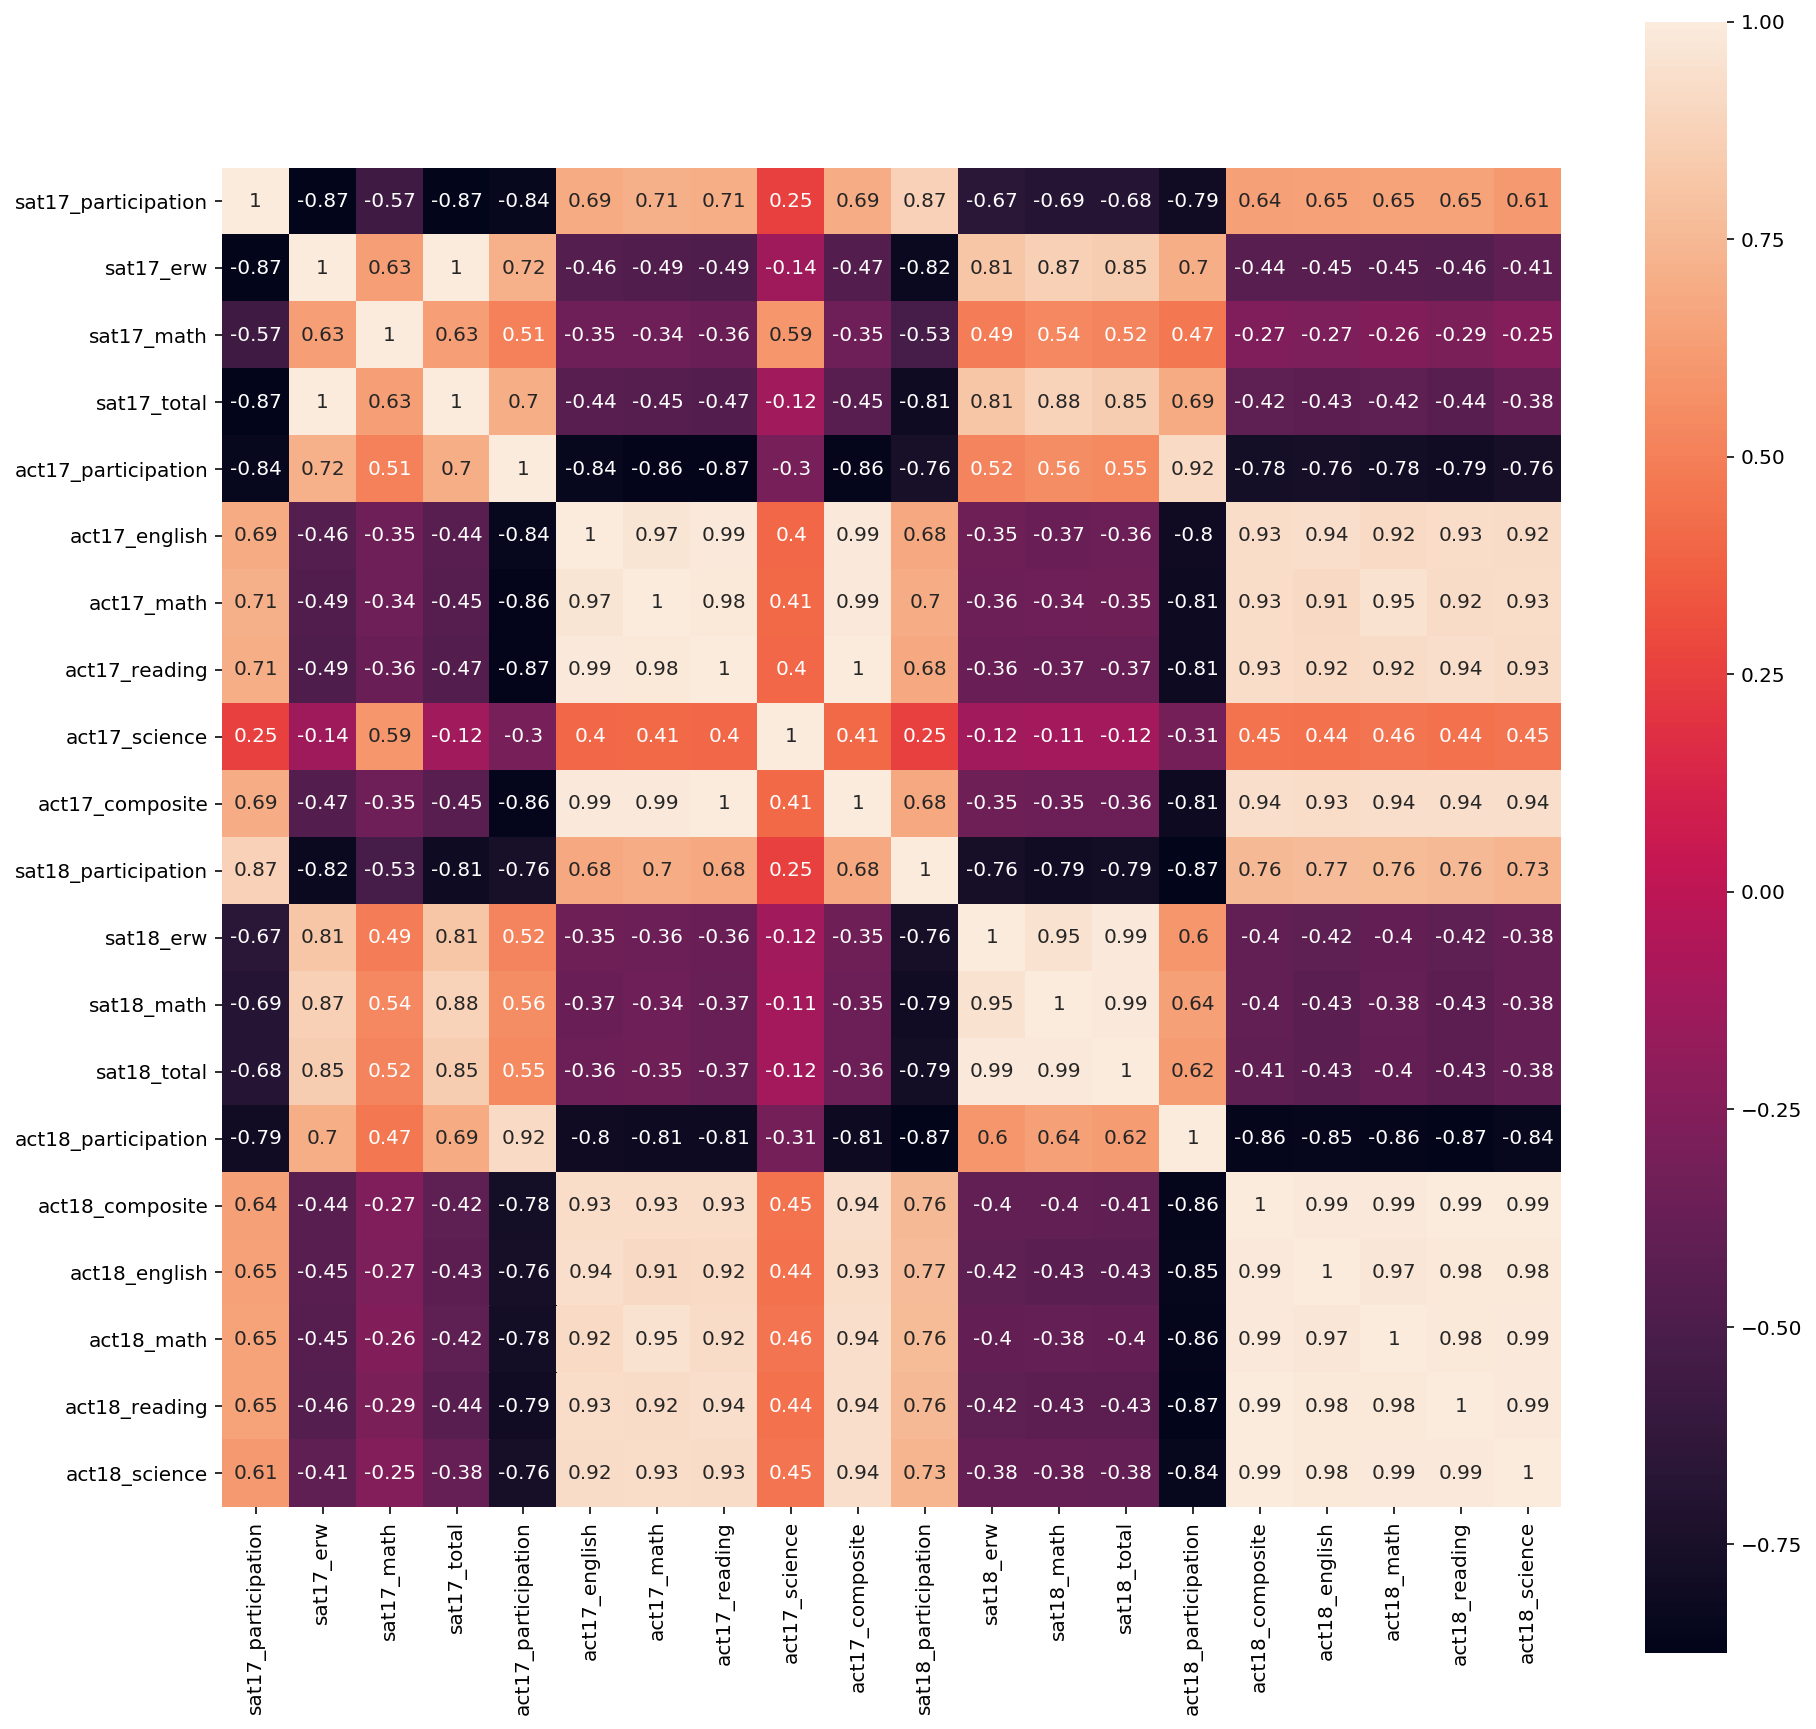

In [65]:
# create Seaborn heat map for cross columns correlation matrix stored within final_corr object.
plt.figure(figsize=(15,15))
sns.heatmap(final_corr,annot=True,square=True);

Overvations from heatmap of correlation among participation and test scores for states.
- There is strong negative corrrelation  between SAT participation rate and SAT total scores in both 2017 (-.81) and 2018 (-.79).
- There is strong negative corrrelation  between ACT participation rate and ACT composite scores in both 2017 (-.86) and 2018 (-.86).
- There is a strong negative corelation between SAT participation rate and ACT participation rate in both 2017 (-.84) and 2018 (-.80).
- There is a moderate negative correlation between average of SAT and ACT total scores within each year.




#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [73]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2 ,figsize=(10,3)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set(title=list_of_titles[i],xlabel = list_of_xlabels[i], ylabel = list_of_ylabels[i])
        
    
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

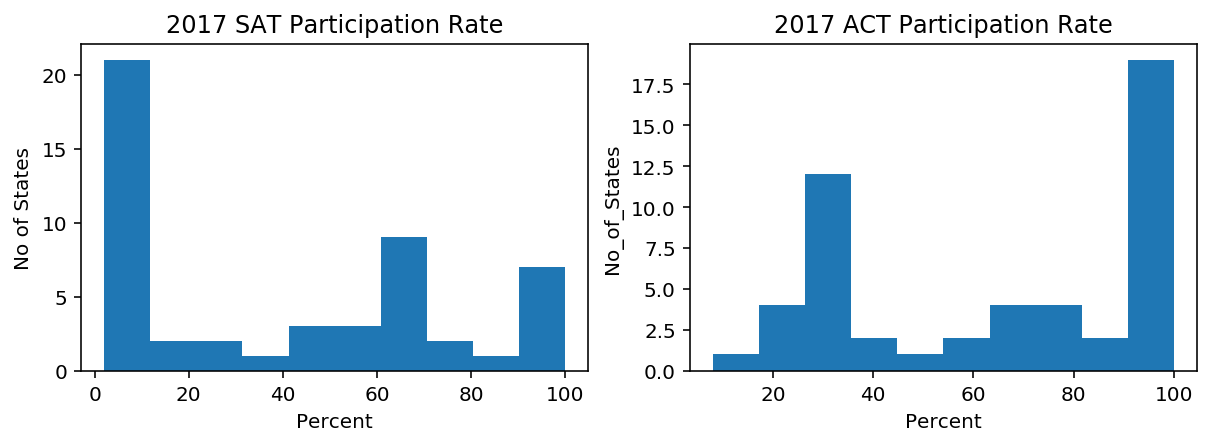

In [76]:
# Plot for Participation rates for SAT & ACT of 2017
subplot_histograms(sat_act_final,['sat17_participation','act17_participation'],\
                                 ['2017 SAT Participation Rate', '2017 ACT Participation Rate'], \
                                 ['Percent','Percent'], ['No of States','No_of_States'])

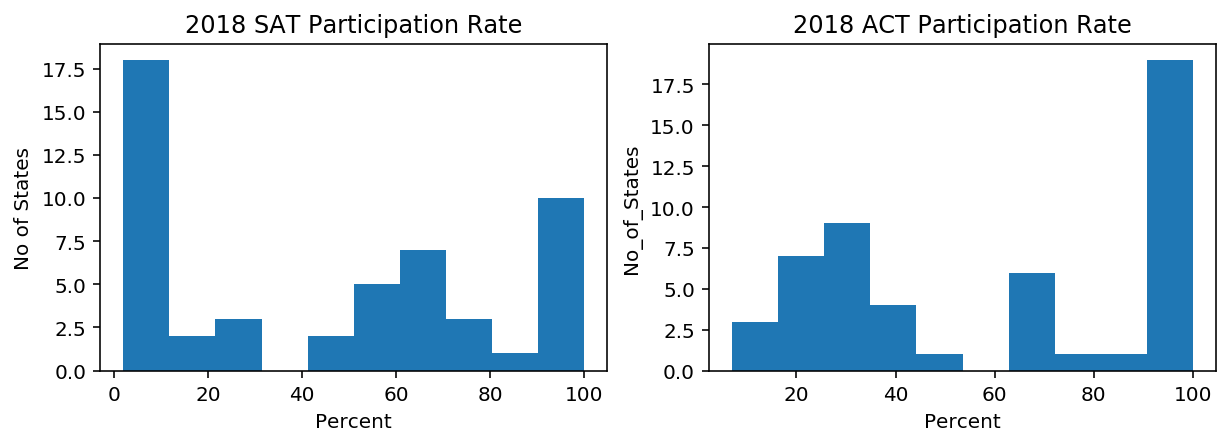

In [77]:
# Plot for Participation rates for SAT & ACT of 2018
subplot_histograms(sat_act_final,['sat18_participation','act18_participation'],\
                                 ['2018 SAT Participation Rate', '2018 ACT Participation Rate'], \
                                 ['Percent','Percent'], ['No of States','No_of_States'])

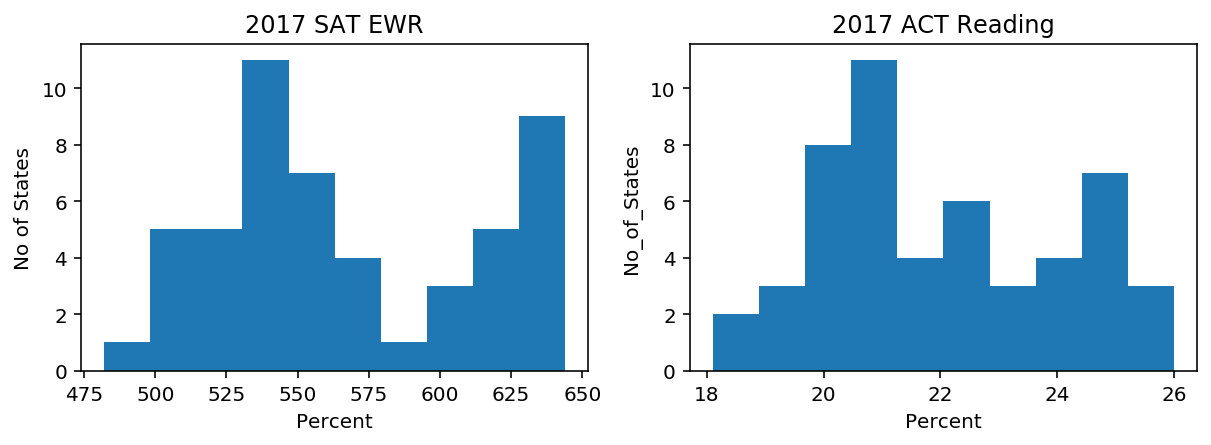

In [79]:
subplot_histograms(sat_act_final,['sat17_erw','act17_reading'],\
                                 ['2017 SAT EWR', '2017 ACT Reading'], \
                                 ['Percent','Percent'], ['No of States','No_of_States'])

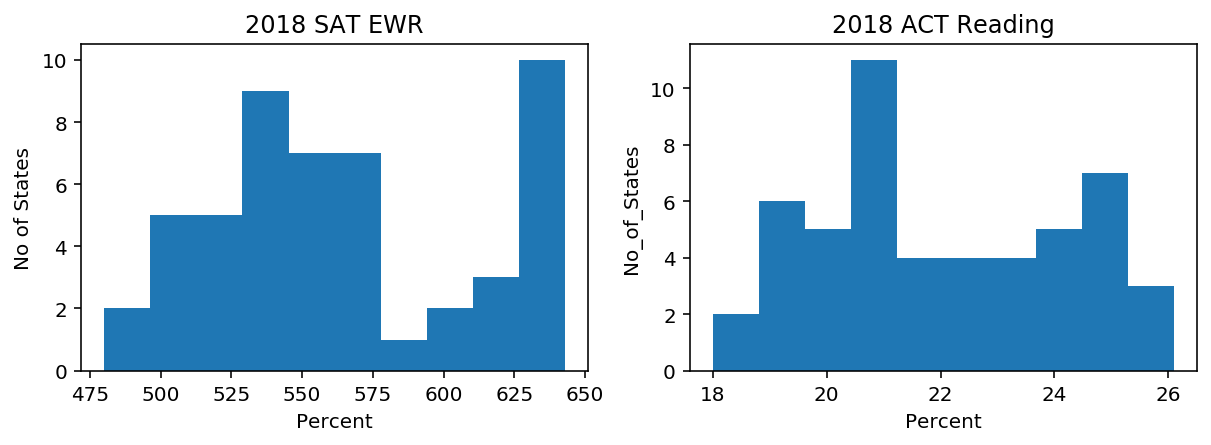

In [80]:
subplot_histograms(sat_act_final,['sat18_erw','act18_reading'],\
                                 ['2018 SAT ERW', '2018 ACT Reading'], \
                                 ['Percent','Percent'], ['No of States','No_of_States'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


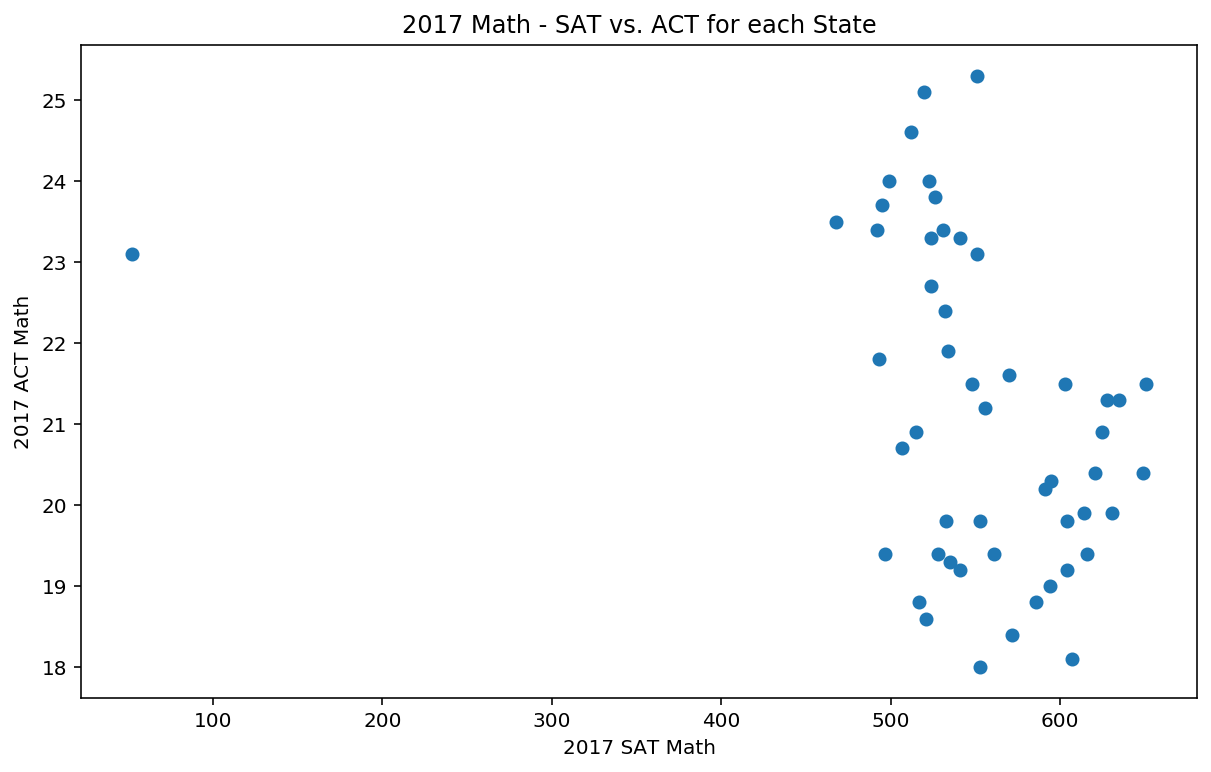

In [87]:
# Scatter plot for '2017 SAT Average Math score and 2017 ACT Average Math score'
fig, ax = plt.subplots(figsize=(10,6))

scatter_pl = ax.scatter(x=sat_act_final["sat17_math"],
                        y=sat_act_final["act17_math"]);

ax.set(title = "2017 Math - SAT vs. ACT for each State", 
       xlabel = "2017 SAT Math",
       ylabel = "2017 ACT Math");

#add a legend
#ax.legend(*scatter_pl.legend_elements(),title="Scores");



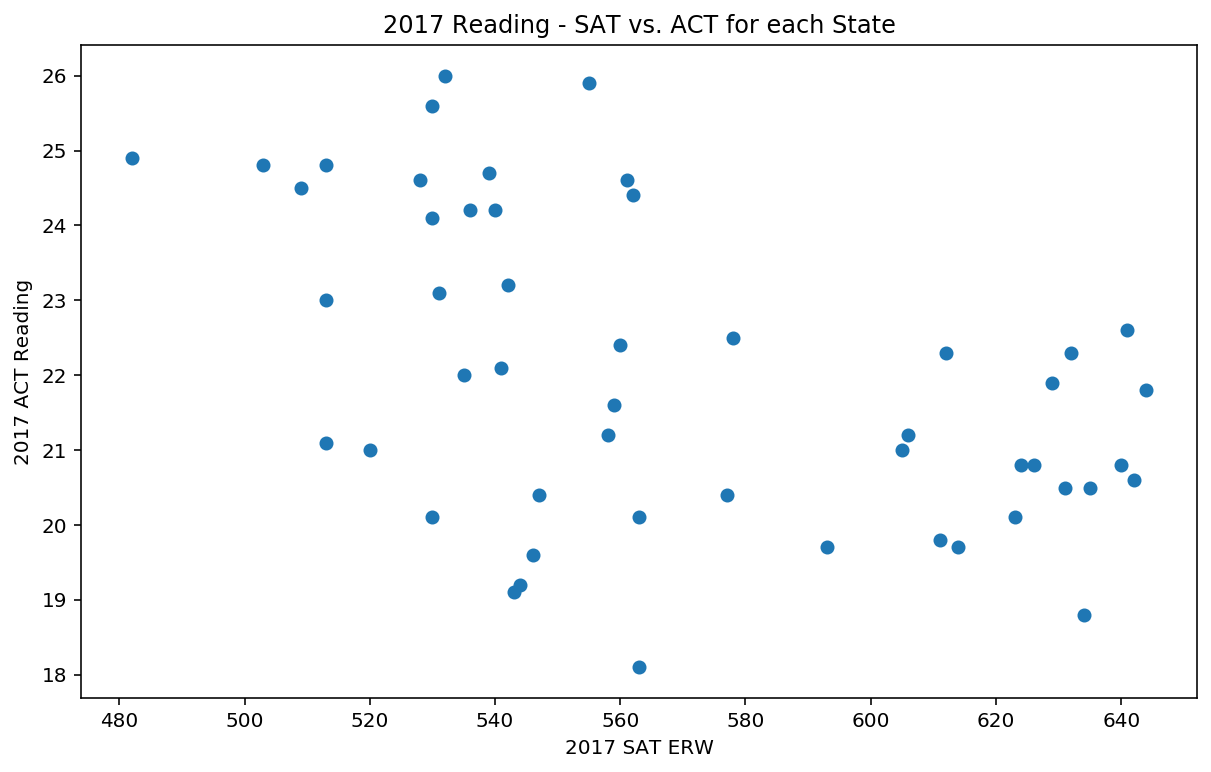

In [90]:
# Scatter plot for '2017 SAT ERW and 2017 ACT Reading for each state'
fig, ax = plt.subplots(figsize=(10,6))

scatter_pl = ax.scatter(x=sat_act_final['sat17_erw'],
                        y=sat_act_final['act17_reading']);

ax.set(title = "2017 Reading - SAT vs. ACT for each State", 
       xlabel = "2017 SAT ERW",
       ylabel = "2017 ACT Reading");

#add a legend
#ax.legend(*scatter_pl.legend_elements(),title="Scores");



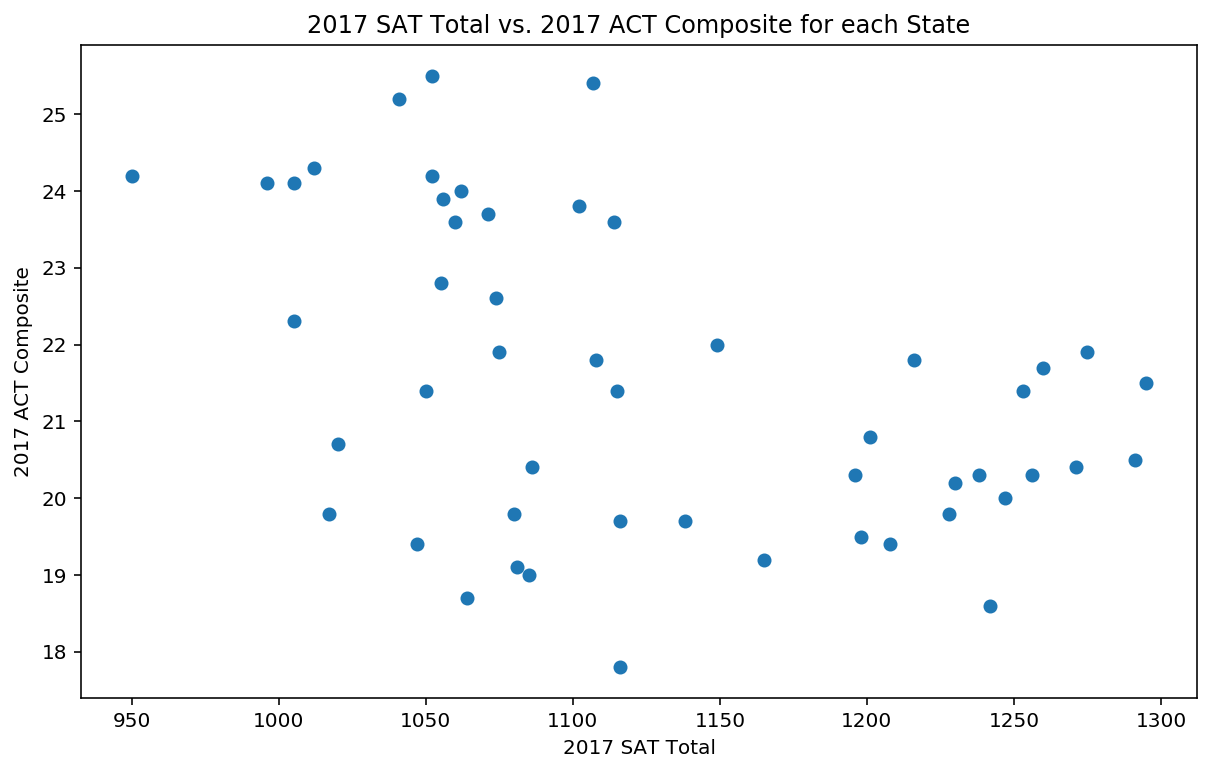

In [93]:
# Scatter plot for '2017 SAT Total score and 2017 ACT Composite score for each state'
fig, ax = plt.subplots(figsize=(10,6))

scatter_pl = ax.scatter(x=sat_act_final["sat17_total"],
                        y=sat_act_final["act17_composite"]);

ax.set(title = "2017 SAT Total vs. 2017 ACT Composite for each State", 
       xlabel = "2017 SAT Total",
       ylabel = "2017 ACT Composite");

#add a legend
#ax.legend(*scatter_pl.legend_elements(),title="Scores");



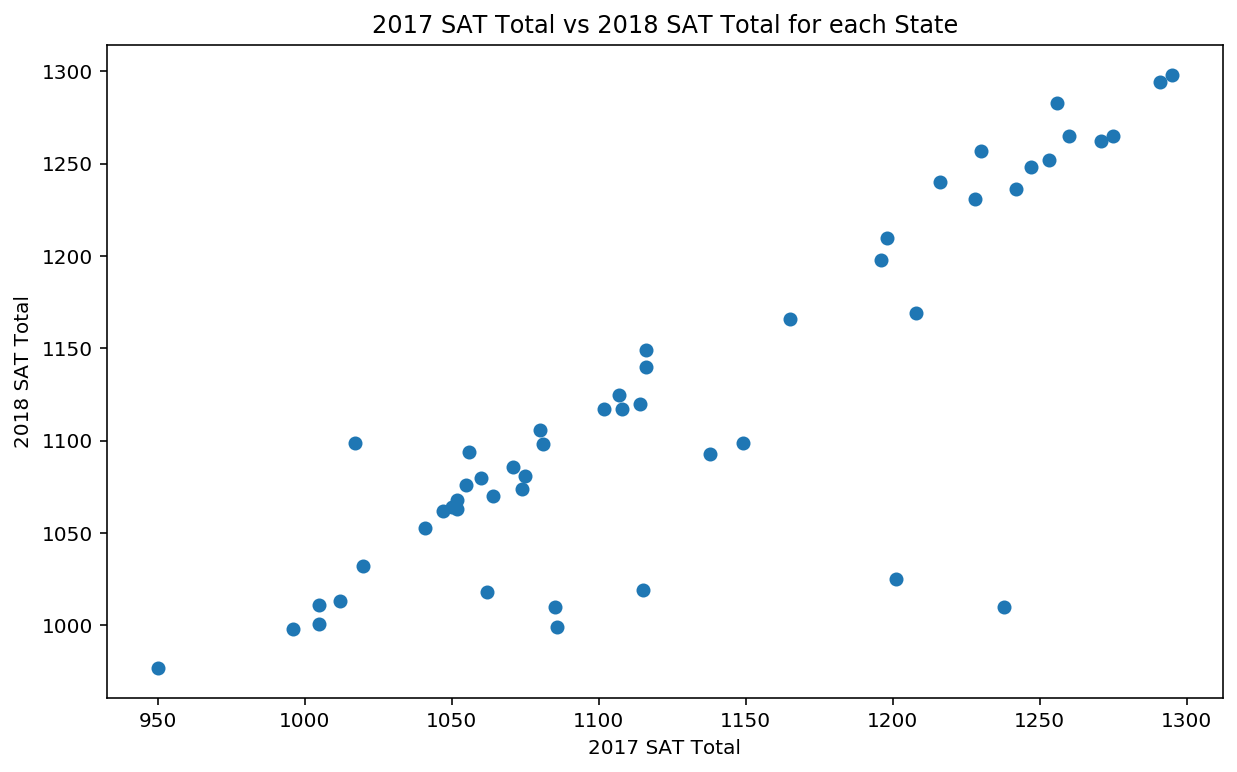

In [91]:
# Scatter plot for '2017 SAT total score and 2018 ACT Composite score for each state'
fig, ax = plt.subplots(figsize=(10,6))

scatter_pl = ax.scatter(x=sat_act_final['sat17_total'],
                        y=sat_act_final['sat18_total']);

ax.set(title = "2017 SAT Total vs 2018 SAT Total for each State", 
       xlabel = "2017 SAT Total",
       ylabel = "2018 SAT Total");

#add a legend
#ax.legend(*scatter_pl.legend_elements(),title="Scores");




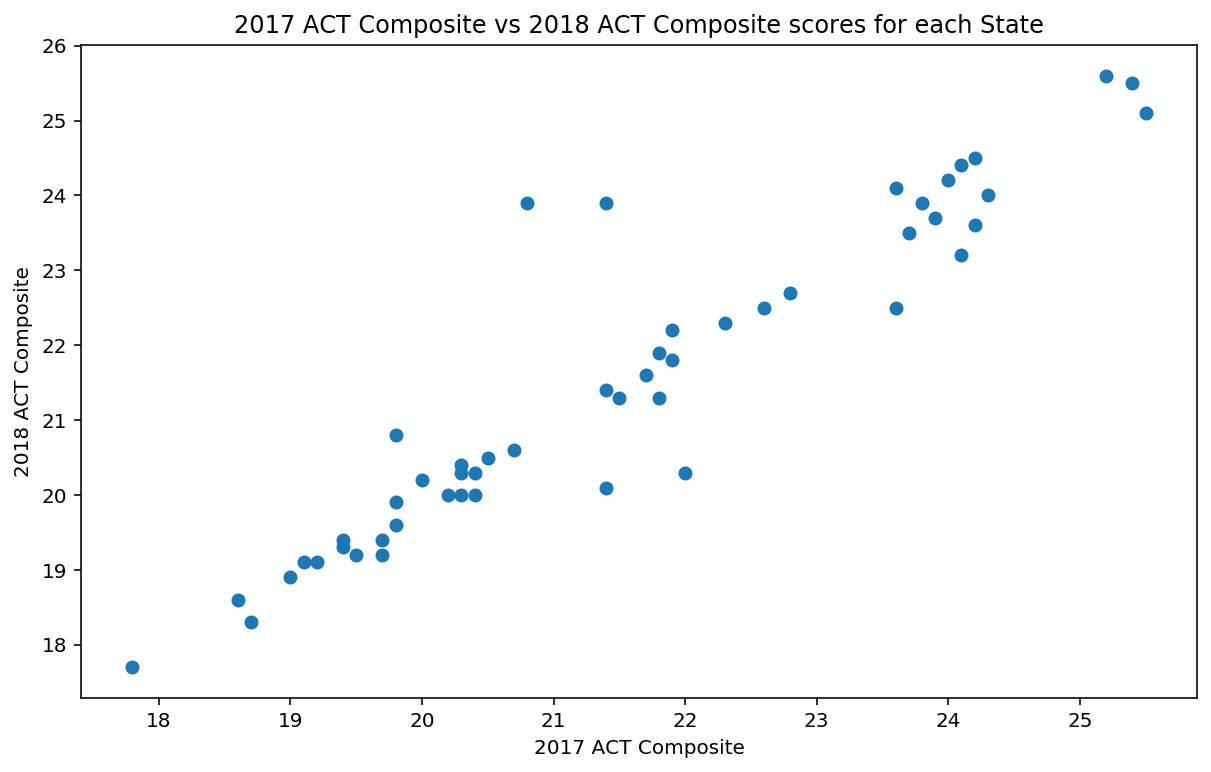

In [95]:
# Scatter plot for '2017 ACT Composite score and 2018 ACT Composite score for each state'
fig, ax = plt.subplots(figsize=(10,6))

scatter_pl = ax.scatter(x=sat_act_final['act17_composite'],
                        y=sat_act_final['act18_composite']);

ax.set(title = "2017 ACT Composite vs 2018 ACT Composite scores for each State", 
       xlabel = "2017 ACT Composite",
       ylabel = "2018 ACT Composite");

#add a legend
#ax.legend(*scatter_pl.legend_elements(),title="Scores");

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [262]:
sns.set(style="whitegrid")

TypeError: 'str' object is not callable

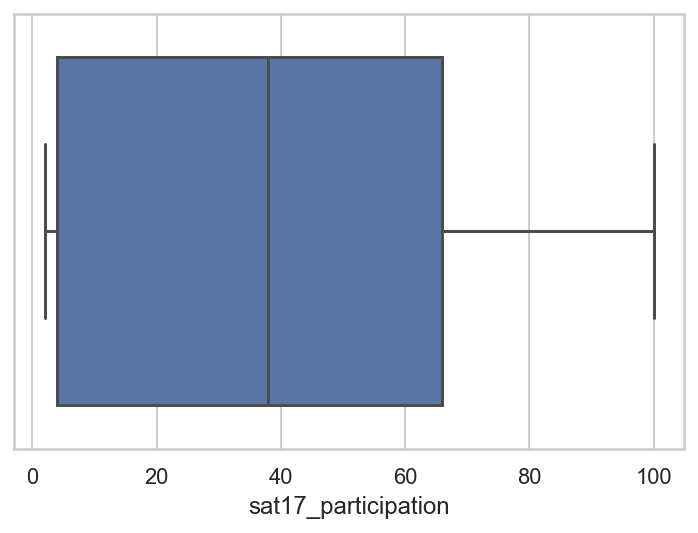

In [265]:
# Code
sns.boxplot(x=sat_act_final['sat17_participation']);
plt.title '2017 Sat Participation');

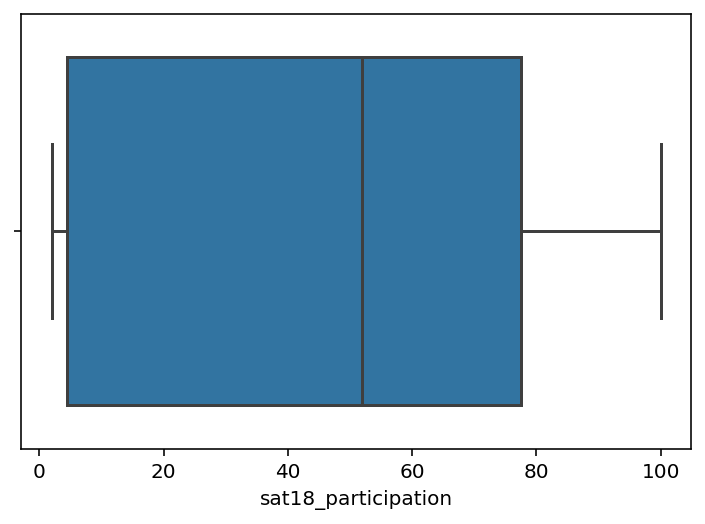

In [261]:
sns.boxplot(x=sat_act_final['sat18_participation']);


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?